In [658]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [659]:
df_train=pd.read_csv('Data_Train_RestCost.csv')
df_test=pd.read_csv('Data_Test_RestCost.csv')

In [660]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [661]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [662]:
df_train.shape

(12690, 9)

In [663]:
duplicate_rows=df_train[df_train.duplicated()]
print(duplicate_rows.shape)

(25, 9)


In [664]:
df_train.drop_duplicates().shape

(12665, 9)

Dropping duplicate rows having all the column values same

In [665]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [666]:
df_train.isnull().values.any()

True

In [667]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

There are total 112, 98, 2 and 1204 null values are present in CITY , LOCALITY, RATING  and VOTES columns respectively

In [668]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Observations:

1. We have 12690 different rows with 9 columns in dataset
2. All the features are of object datatype except the output COST label i.e Integer and RESTAURANT_ID
3. There are null values present in RATING , VOTES, LOCALITY and CITY  data columns.

In [669]:
columns=['CITY','LOCALITY','RATING','VOTES']
for column in columns:
    df_train[column].fillna(df_train[column].mode()[0],inplace=True)

Since all the null value containing columns are of object datatype, so here I have used mode of the columns to fill null values

In [670]:
df_train.isnull().values.any()

False

In [671]:
df_train['VOTES'] = df_train['VOTES'].str.replace(r'\D', '').astype(int)

Since VOTE column includes values with mix(int+char) datatype, here I have used pandas replace method to convert this into the int format, so the model can be trained on integer values.

In [672]:
df_train['RATING'] = df_train['RATING'].str.replace('NEW', ' ')

In [673]:
df_train['RATING'] = pd.to_numeric(df_train['RATING'], errors='coerce')

since RATING column includes 'NEW' string (New restaurants with no available rating) multiple times inbetween, I have used replace to convert these to NAN first and then changed datatype from Object to Float.

In [674]:
df_train['RATING'].dtypes

dtype('float64')

In [675]:
df_train.isnull().values.any()

True

In [676]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING           1202
VOTES               0
COST                0
dtype: int64

In [677]:
df_train['RATING'].fillna(df_train['RATING'].mean(),inplace=True)

In [678]:
df_train.isnull().values.any()

False

In [679]:
for column in df_train.columns:
    if df_train[column].dtypes==object:
        print(str(column)+':'+str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('************************************************************************************************************')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

Univariate - Analysis

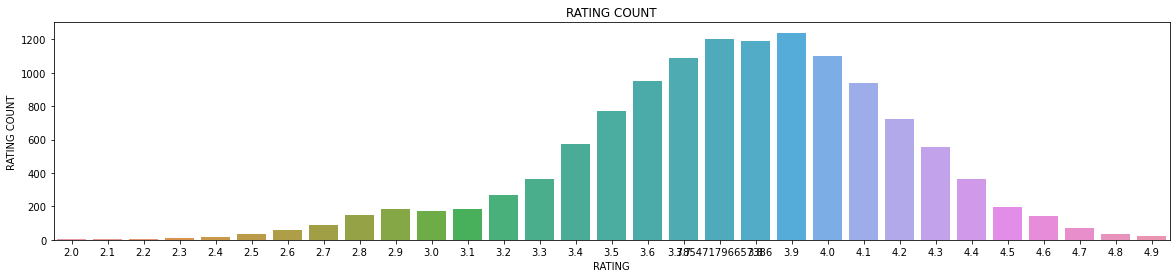

3.900000    1240
3.785472    1202
3.800000    1190
4.000000    1099
3.700000    1086
3.600000     951
4.100000     936
3.500000     771
4.200000     723
3.400000     575
4.300000     556
3.300000     365
4.400000     362
3.200000     266
4.500000     199
2.900000     186
3.100000     186
3.000000     170
2.800000     146
4.600000     141
2.700000      89
4.700000      69
2.600000      61
2.500000      35
4.800000      32
4.900000      22
2.400000      15
2.300000      10
2.100000       3
2.200000       2
2.000000       2
Name: RATING, dtype: int64


In [680]:
plt.subplots(figsize=(20,4))
sns.countplot(x='RATING',data=df_train)
plt.title('RATING COUNT')
plt.xlabel('RATING')
plt.ylabel('RATING COUNT')
plt.show()

print(df_train['RATING'].value_counts())

Observations:
    
    1. From above plot and data we observe that 3.9 rating has highest counts(1240)
    2. 2 and 2.20 ratings have least count(2 for each)
    3. Also, we observe that there are some outliers between 3.5 and 3.7 which I will remove.

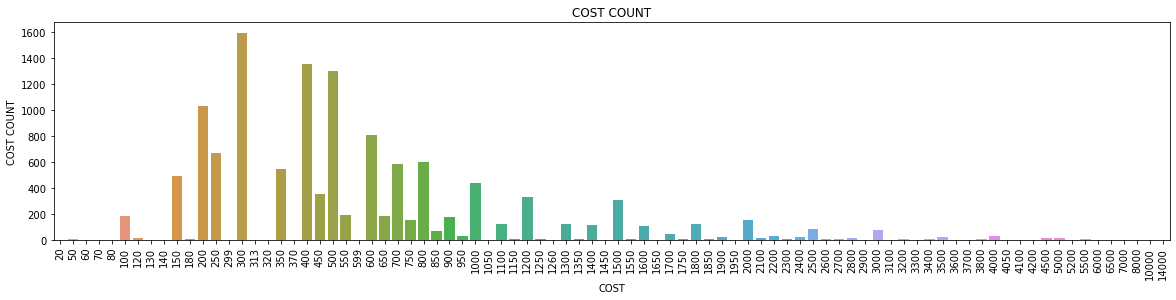

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64


In [681]:
plt.subplots(figsize=(20,4))
sns.countplot(x='COST',data=df_train)
plt.title('COST COUNT')
plt.xlabel('COST')
plt.xticks(rotation='vertical')
plt.ylabel('COST COUNT')
plt.show()

print(df_train['COST'].value_counts())

Observations:
    
    1.From above plot and data we observe that 300 cost has highest counts(1595), followed by 400 and 500.
    2.We can observe that there are some costs like 14000, 5500,4100 etc, which have single or very less count. These are the   outliers which I will remove to make Input data more Normalized for model training.

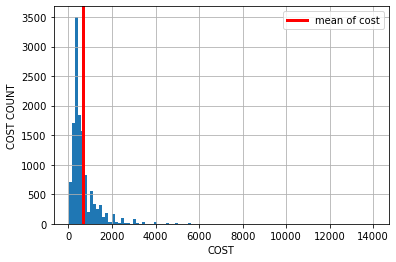

In [682]:
cost=df_train['COST'].hist(bins=100)
mean_cost=np.mean(df_train['COST'])
plt.axvline(mean_cost,linewidth=3,color='red',label='mean of cost')
plt.xlabel('COST')
plt.ylabel('COST COUNT')
plt.legend()
plt.show()

From above plot we observe that the mean cost value lies nearby 700.

Bivariate - Analysis

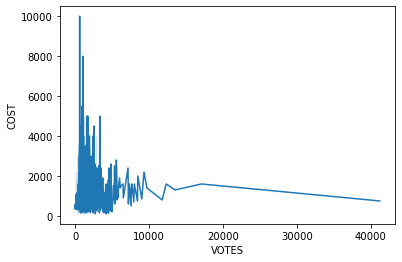

In [683]:
sns.lineplot(x='VOTES',y='COST',data=df_train)
plt.show()

Above I have plotted VOTES Vs COST to exactly know the kind of Machine learning problem it is, as VOTES is comparatively better correlated with COST so we can analyse the type of problem i.e - whether it is Regression or Classification. As the plot shows non-linear relationship between VOTES and COST, we can understand it is more Classification kind of problem than the linear one.

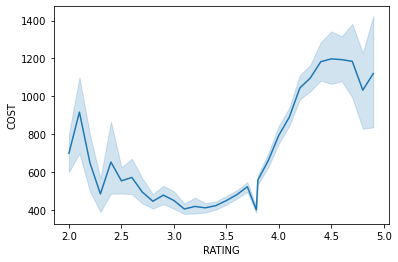

In [684]:
sns.lineplot(x='RATING',y='COST',data=df_train)
plt.show()

Observations:
    
    1. From above plot we observe that initially upto rating 2.5, there is a linear positive then neagative relationship between RATING and COST.
    2. But, then after 2.5 rating there is fall in COST in zigzag manner with increasing RATING, then after approx 3.5 rating again there is high rise in COST with increase in RATING till approx 4.5 rating.
    3. So, overall there is no high linear relationship between RATING and COST

In [685]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['TITLE','CUISINES','TIME','CITY','LOCALITY']
for column in columns:
    df_train[column]=le.fit_transform(df_train[column])

Since all above columns are of object datatype, I have used LabelEncoder to change these to int labels

In [686]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,3.6,49,1200
1,33,13198,289,1885,67,1046,4.2,30,1500
2,31,10915,2976,661,67,1101,3.8,221,800
3,95,6346,4130,275,222,136,4.1,24,800
4,50,15387,1766,615,222,620,3.8,165,300


Summary Statistics

In [687]:
df_train.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,7759.134121,2235.193932,1180.084003,142.281403,652.391568,3.785472,380.405753,655.252246
std,32.762427,4504.874150,1204.091664,754.459944,83.921428,399.116379,0.401568,809.110447,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,20.000000
25%,31.000000,3863.250000,1185.250000,555.000000,67.000000,337.000000,3.600000,44.000000,300.000000
50%,59.000000,7740.000000,2416.500000,1123.000000,131.000000,582.000000,3.800000,132.000000,500.000000
75%,95.000000,11688.750000,3222.750000,1847.000000,222.000000,1009.000000,4.000000,405.000000,800.000000
max,112.000000,15573.000000,4154.000000,2688.000000,358.000000,1415.000000,4.900000,41186.000000,14000.000000


Observations:

1. The min and max RESTAURANT_ID is 0 and 15573 respectively
2. The min and max Rating is 2.0 and 4.90 respectively
3. The min and max VOTES is 4 and 41186 respectively
4. The min and max COST is 20 and 14000 respectively

Correlation Analysis

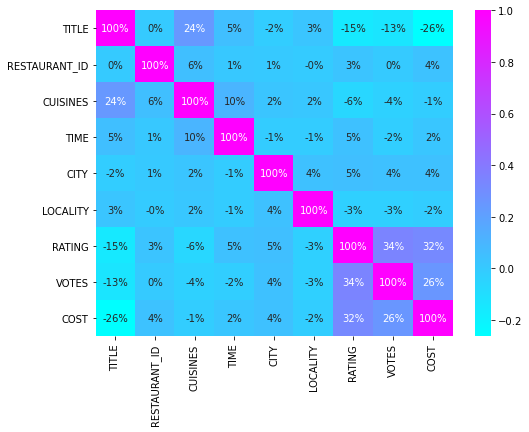

In [688]:
plt.figure(figsize=(8,6))
cor=df_train.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

Correlation with Target

Text(0.5, 1.0, 'correlation with target variable')

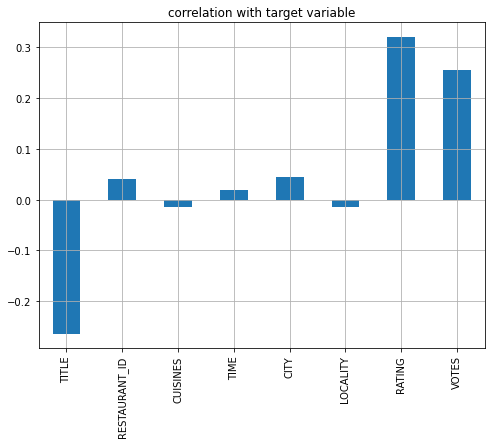

In [689]:
plt.figure(figsize=(8,6))
df_train.drop('COST',axis=1).corrwith(df_train['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correlation with target variable")

Plotting Distribution of Skewness

In [690]:
df_train.skew()

TITLE            -0.069803
RESTAURANT_ID     0.006947
CUISINES         -0.218782
TIME              0.306186
CITY              0.266332
LOCALITY          0.352317
RATING           -0.537487
VOTES            14.609221
COST              3.978801
dtype: float64

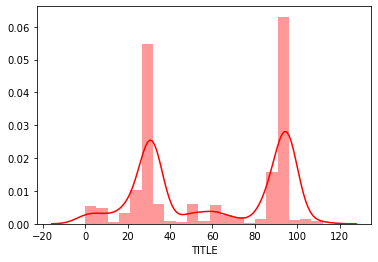

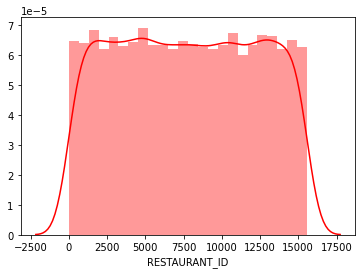

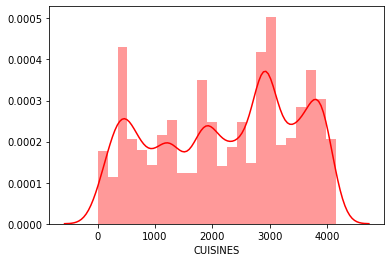

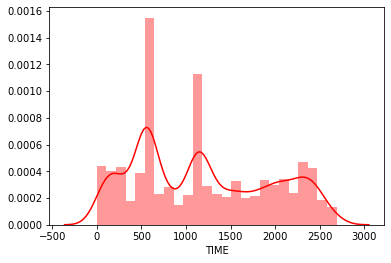

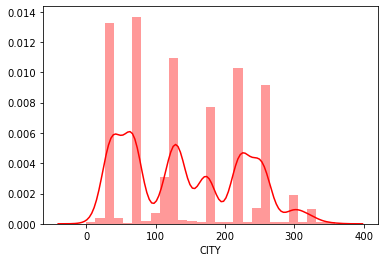

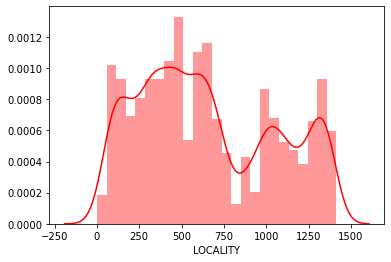

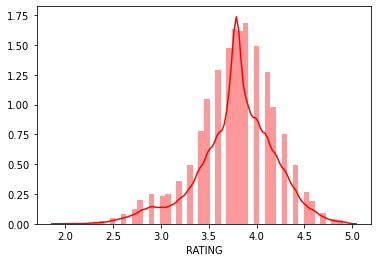

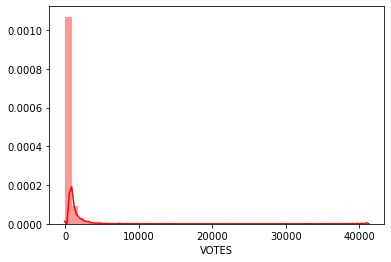

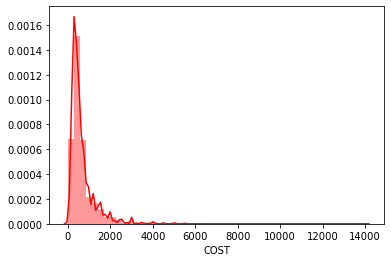

In [691]:
for col in df_train.describe().columns:
    sns.distplot(df_train[col],color='r')
    plt.show()

Detecting Outliers

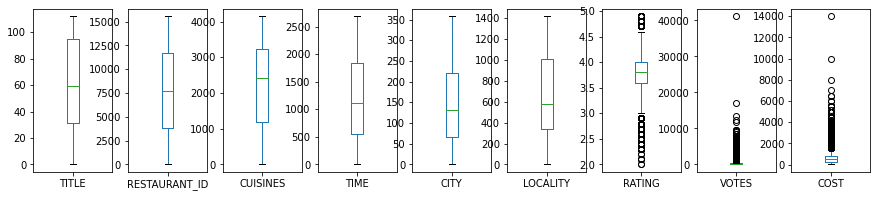

In [692]:
axs = df_train.plot(kind='box',subplots=True,figsize=(15,3))

From above plots we observe that there are very high no of outliers present in RATING,VOTES and COST columns of the dataset.

Removing Outliers

In [693]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
df_train_new=df_train[(z<3).all(axis=1)]

In [694]:
df_train_new.shape

(12200, 9)

In [695]:
df_train.shape

(12690, 9)

Above I have removed outliers because it allowed me to do so and also it did not change dataset properties significantly (Outliers were present in about 3% of the actual no of rows)

In [696]:
df_train_new.skew()

TITLE           -0.084037
RESTAURANT_ID    0.012791
CUISINES        -0.214221
TIME             0.315306
CITY             0.279942
LOCALITY         0.350401
RATING          -0.431606
VOTES            2.598752
COST             1.821008
dtype: float64

In [697]:
df_train_new['COST'].unique()

array([1200, 1500,  800,  300,  600, 1600,  200,  900,  400, 1400,  350,
        500,  450,  700, 1000,  250, 2000, 1100,  100,  850, 2500, 1800,
        150,  650,  750,  950, 1300,  180, 2100,  550,   50, 1900, 1750,
       1350,   60, 2200,   80, 1450,  120, 2400, 1700, 1550, 1150,  130,
       1050,  313, 2300, 1250,   20, 1650, 1850,  140,  599,  299,  370,
       1950,  320, 1260,   70], dtype=int64)

In [698]:
df_train_new['COST'].max()

2500

In [699]:
df_train_new['COST'].min()

20

Dividing output into only two class labels to better analyse classification problem (Using Panda's cut method)

In [700]:
df_train_new.COST=pd.cut(df_train_new.COST,[0,1250,2500],labels=[0,1])

In [701]:
x=df_train_new.drop(columns=['COST'],axis=1)

In [702]:
y=df_train_new['COST']
y.value_counts()

0    11103
1     1097
Name: COST, dtype: int64

In [703]:
x.skew()

TITLE           -0.084037
RESTAURANT_ID    0.012791
CUISINES        -0.214221
TIME             0.315306
CITY             0.279942
LOCALITY         0.350401
RATING          -0.431606
VOTES            2.598752
dtype: float64

Normalization and Standardization of Input before giving it for the Model training

In [704]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x['VOTES']=pt.fit_transform(x['VOTES'].values.reshape(-1,1))

In [705]:
x.skew()

TITLE           -0.084037
RESTAURANT_ID    0.012791
CUISINES        -0.214221
TIME             0.315306
CITY             0.279942
LOCALITY         0.350401
RATING          -0.431606
VOTES            0.008351
dtype: float64

In [706]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

Importing Classifiers, Models and Metrics

In [707]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

Model Training

In [708]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20,stratify=y)

In [709]:
print(x_train.shape,'\t\t',x_test.shape)

(9760, 8) 		 (2440, 8)


In [710]:
print(y_train.shape,'\t\t',y_test.shape)

(9760,) 		 (2440,)


In [711]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
model=[lg,dtc,knc,svc,gnb]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion_matrix:',confusion_matrix(y_test,y_pred))
    print('classification_report:',classification_report(y_test,y_pred))
    print('\n')

Score of LogisticRegression() is: 0.9089139344262295
accuracy score: 0.909016393442623
confusion_matrix: [[2210   11]
 [ 211    8]]
classification_report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2221
           1       0.42      0.04      0.07       219

    accuracy                           0.91      2440
   macro avg       0.67      0.52      0.51      2440
weighted avg       0.87      0.91      0.87      2440



Score of DecisionTreeClassifier() is: 1.0
accuracy score: 0.9151639344262295
confusion_matrix: [[2110  111]
 [  96  123]]
classification_report:               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2221
           1       0.53      0.56      0.54       219

    accuracy                           0.92      2440
   macro avg       0.74      0.76      0.75      2440
weighted avg       0.92      0.92      0.92      2440



Score of KNeighborsClassifier() is: 0.9341

From above results we see that DTC() model is performing better than others

GridSearch CV Hyperparameter Tuning

In [320]:
grid_param={'C':[1,10],'random_state':range(42,100)}
gd_sr=GridSearchCV(estimator=lg,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'C': 1, 'random_state': 42}


In [321]:
grid_param={'criterion':['gini','entropy'],'random_state':range(42,100),'max_depth':[4,5,6,15,20]}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'random_state': 78}


In [322]:
grid_param={'n_neighbors':range(1,100)}
gd_sr=GridSearchCV(estimator=knc,param_grid=grid_param)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'n_neighbors': 9}


Transferring best parameters to the classifiers for the better performance

In [712]:
model=[LogisticRegression(C=1,random_state=42),DecisionTreeClassifier(criterion='gini',random_state=78,max_depth=6),KNeighborsClassifier(n_neighbors=9)]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))
    print('classification report:',classification_report(y_test,y_pred))

Score of LogisticRegression(C=1, random_state=42) is: 0.9089139344262295
accuracy score: 0.909016393442623
confusion matrix: [[2210   11]
 [ 211    8]]
classification report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2221
           1       0.42      0.04      0.07       219

    accuracy                           0.91      2440
   macro avg       0.67      0.52      0.51      2440
weighted avg       0.87      0.91      0.87      2440

Score of DecisionTreeClassifier(max_depth=6, random_state=78) is: 0.9376024590163935
accuracy score: 0.9307377049180328
confusion matrix: [[2177   44]
 [ 125   94]]
classification report:               precision    recall  f1-score   support

           0       0.95      0.98      0.96      2221
           1       0.68      0.43      0.53       219

    accuracy                           0.93      2440
   macro avg       0.81      0.70      0.74      2440
weighted avg       0.92      0.93     

From above we observe DTC() model is again performing best also it has better F1 score compared to others.

Cross Validation of Scores

In [713]:
model=[LogisticRegression(C=1,random_state=42),DecisionTreeClassifier(max_depth=6, random_state=78),KNeighborsClassifier(n_neighbors=9)]
for m in model:
    mscores=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.90786241 0.91154791 0.91277641 0.90909091 0.91277641 0.9102091
 0.90897909 0.90897909 0.90774908 0.90651907 0.90651907 0.90774908
 0.90405904 0.90774908 0.91512915]
mean score and standard deviation of LogisticRegression(C=1, random_state=42) is 0.9091796593641613 0.0027842357707814768


[0.93980344 0.93611794 0.93857494 0.92260442 0.92137592 0.92373924
 0.93357934 0.92373924 0.92619926 0.91635916 0.92865929 0.92865929
 0.9298893  0.91881919 0.92496925]
mean score and standard deviation of DecisionTreeClassifier(max_depth=6, random_state=78) is 0.9275392803068082 0.006787039471171191


[0.91646192 0.91646192 0.92137592 0.92628993 0.91400491 0.91881919
 0.91389914 0.92373924 0.91143911 0.91758918 0.92619926 0.91143911
 0.91143911 0.91266913 0.91512915]
mean score and standard deviation of KNeighborsClassifier(n_neighbors=9) is 0.9171304145473886 0.0049872400280969054




From above CVS we can find that the models are performing well and there is no underfitting or overfitting present in any of the model

Ensembling Techniques to Boost up the Score

In [714]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [715]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))
    print('classification report:',classification_report(y_test,y_pred))
    print('*****************************************************************************************************************')
    print('\n')

Score of RandomForestClassifier() is: 1.0
accuracy score: 0.9307377049180328
confusion matrix: [[2195   26]
 [ 143   76]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.99      0.96      2221
           1       0.75      0.35      0.47       219

    accuracy                           0.93      2440
   macro avg       0.84      0.67      0.72      2440
weighted avg       0.92      0.93      0.92      2440

*****************************************************************************************************************


Score of AdaBoostClassifier() is: 0.9378073770491804
accuracy score: 0.9344262295081968
confusion matrix: [[2188   33]
 [ 127   92]]
classification report:               precision    recall  f1-score   support

           0       0.95      0.99      0.96      2221
           1       0.74      0.42      0.53       219

    accuracy                           0.93      2440
   macro avg       0.84      0.70     

From above results we can see that GradientBoostingClassifier() is performing better than others followed by AdaBoostClassifier() 

Cross Validation Scores -

In [716]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    mscores=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.93243243 0.93611794 0.93120393 0.93734644 0.93120393 0.9397294
 0.93234932 0.94095941 0.9397294  0.92619926 0.92742927 0.93357934
 0.93480935 0.9397294  0.92742927]
mean score and standard deviation of RandomForestClassifier() is 0.934016539182591 0.004700652056501489


[0.94226044 0.94103194 0.93120393 0.93243243 0.93243243 0.93726937
 0.94341943 0.9397294  0.93603936 0.92250923 0.93480935 0.93849938
 0.93357934 0.94095941 0.93603936]
mean score and standard deviation of AdaBoostClassifier() is 0.9361476538598309 0.005185464637538497


[0.94963145 0.94103194 0.93611794 0.93980344 0.93980344 0.93480935
 0.94218942 0.93849938 0.93480935 0.9298893  0.93234932 0.9397294
 0.9298893  0.9397294  0.94095941]
mean score and standard deviation of GradientBoostingClassifier() is 0.9379494556616329 0.004972523880187362


[0.92997543 0.93488943 0.92997543 0.93120393 0.94103194 0.93480935
 0.93849938 0.93849938 0.93234932 0.92127921 0.93480935 0.9397294
 0.93111931 0.94095941 0.93603936]
mean sc

Confusion Metrices

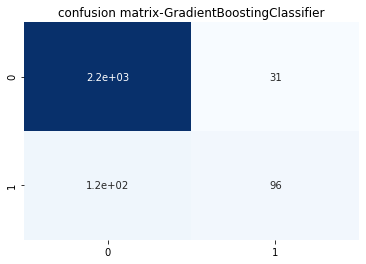

In [717]:
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)
predgd=gd.predict(x_test)
cm=confusion_matrix(y_test,predgd)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title('confusion matrix-GradientBoostingClassifier')
plt.show()

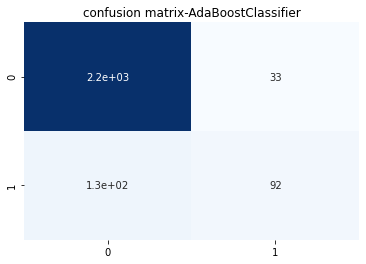

In [718]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
cm=confusion_matrix(y_test,predad)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title('confusion matrix-AdaBoostClassifier')
plt.show()

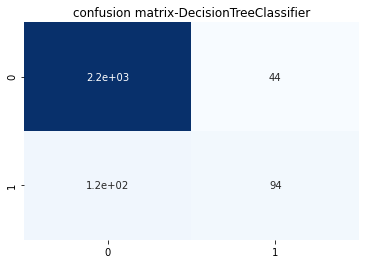

In [719]:
dtc=DecisionTreeClassifier(max_depth=6, random_state=78)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
cm=confusion_matrix(y_test,preddtc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title('confusion matrix-DecisionTreeClassifier')
plt.show()

AUC-ROC scores

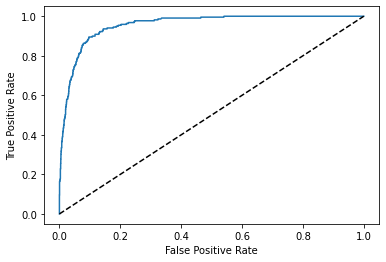

0.7121992438306822


In [720]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gd.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predgd)
print(auc_score)

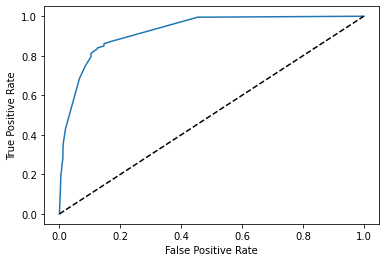

0.7047064241497207


In [721]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,preddtc)
print(auc_score)

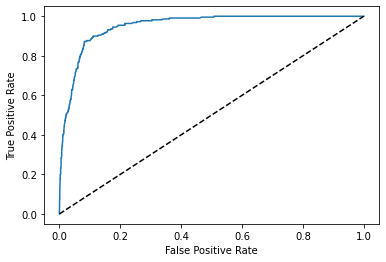

0.7026165761031581


In [722]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predad)
print(auc_score)

From above Confusion metrices and AUC-ROC curves, we observe that GradientBoostingClassifier is performing better than the rest.

Saving GradientBoostingClassifier for the future prediction

In [723]:
import joblib
file='restcostgd.pkl'
joblib.dump(gd,file)

['restcostgd.pkl']

Test Data Analysis and Saved Model's predictions

In [725]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [726]:
df_test.shape

(4231, 8)

In [727]:
df_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [728]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [729]:
duplicate_rows=df_test[df_test.duplicated()]
print(duplicate_rows.shape)

(1, 8)


In [730]:
df_test.drop_duplicates().shape

(4230, 8)

In [731]:
columns=['CITY','LOCALITY','RATING','VOTES']
for column in columns:
    df_test[column].fillna(df_test[column].mode()[0],inplace=True)

In [732]:
df_train.isnull().values.any()

False

In [733]:
df_test['VOTES'] = df_test['VOTES'].str.replace(r'\D', '').astype(int)

In [734]:
df_test['RATING'] = df_test['RATING'].str.replace('NEW', ' ')

In [735]:
df_test['RATING'] = pd.to_numeric(df_test['RATING'], errors='coerce')

In [736]:
df_test['RATING'].dtypes

dtype('float64')

In [737]:
df_test.isnull().values.any()

True

In [738]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY               0
LOCALITY           0
RATING           400
VOTES              0
dtype: int64

In [739]:
df_test['RATING'].fillna(df_test['RATING'].mean(),inplace=True)

In [740]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['TITLE','CUISINES','TIME','CITY','LOCALITY']
for column in columns:
    df_test[column]=le.fit_transform(df_test[column])

In [741]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,110,662,4.3,564
1,75,12680,1632,933,96,221,4.2,61
2,23,1411,1455,219,96,411,3.8,350
3,66,204,208,1071,41,456,3.8,1445
4,75,13453,1637,208,78,300,3.6,23


Summary Statistics

In [742]:
df_test.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000
mean,45.781612,7791.438431,928.372489,523.118884,58.278658,383.368944,3.781545,389.505791
std,26.409174,4458.797621,498.480193,340.539440,38.707396,234.889944,0.412295,800.665248
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.100000,3.000000
25%,23.000000,3908.500000,484.000000,242.000000,18.000000,192.000000,3.600000,42.000000
50%,42.000000,7798.000000,1008.000000,480.000000,55.000000,350.000000,3.800000,134.000000
75%,75.000000,11634.000000,1320.000000,840.500000,96.000000,581.500000,4.000000,422.500000
max,85.000000,15572.000000,1726.000000,1182.000000,150.000000,833.000000,4.900000,15205.000000


Correlation Analysis

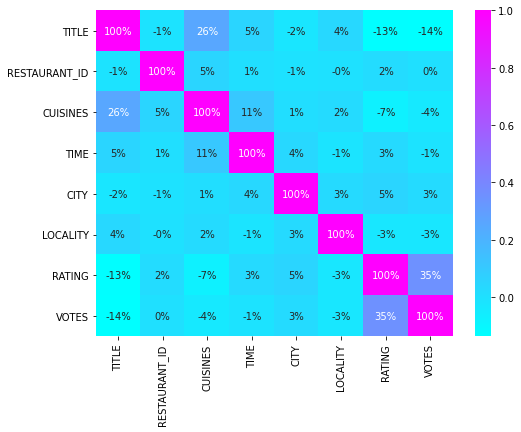

In [743]:
plt.figure(figsize=(8,6))
cor=df_test.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

Plotting Distribution of Skewness

In [744]:
df_test.skew()

TITLE           -0.019891
RESTAURANT_ID    0.006586
CUISINES        -0.211171
TIME             0.314497
CITY             0.086664
LOCALITY         0.313354
RATING          -0.598827
VOTES            7.054846
dtype: float64

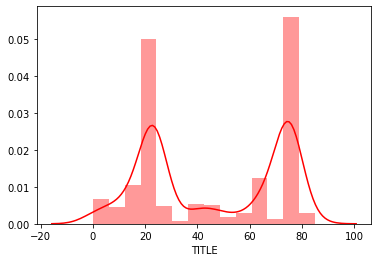

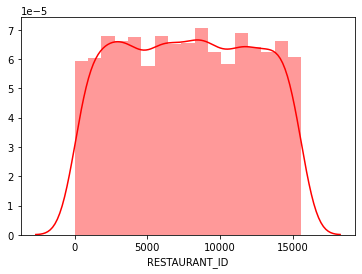

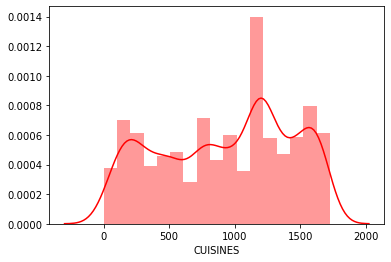

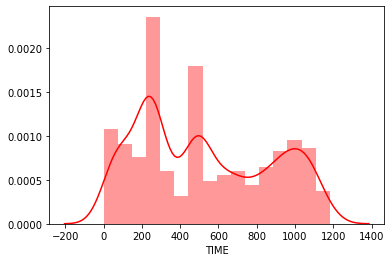

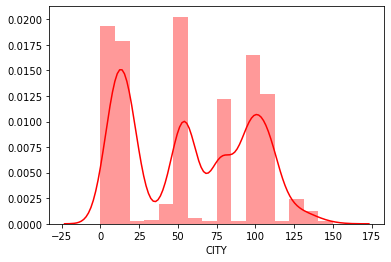

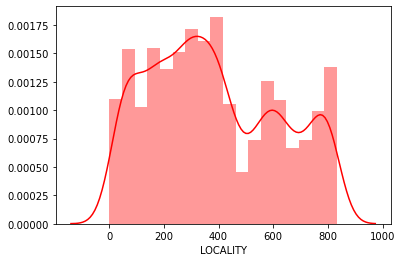

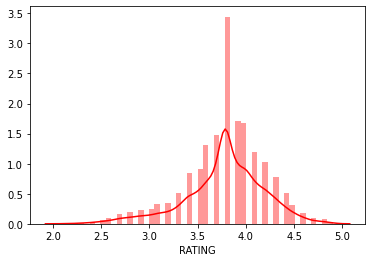

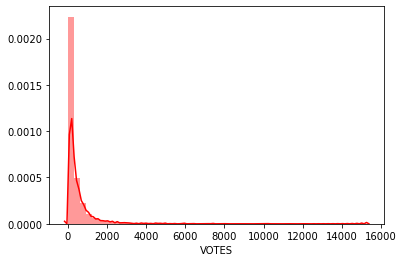

In [745]:
for col in df_test.describe().columns:
    sns.distplot(df_test[col],color='r')
    plt.show()

Detecting Outliers

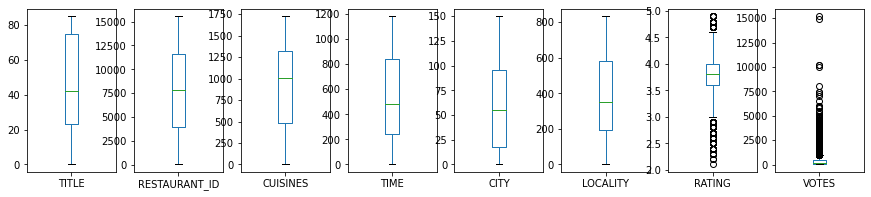

In [746]:
axs = df_test.plot(kind='box',subplots=True,figsize=(15,3))

From above plots we observe that there are very high no of outliers present in RATING and VOTES columns of the dataset.

Removing Outliers

In [747]:
from scipy.stats import zscore
z=np.abs(zscore(df_test))
df_test_new=df_test[(z<3).all(axis=1)]

In [748]:
df_test_new.shape

(4124, 8)

In [749]:
df_test.shape

(4231, 8)

Above I have removed outliers because it allowed me to do so and also it did not change dataset properties significantly (Outliers were present in about 2% of the actual no of rows)

In [750]:
df_test_new.skew()

TITLE           -0.036254
RESTAURANT_ID    0.001736
CUISINES        -0.206028
TIME             0.311763
CITY             0.082236
LOCALITY         0.308123
RATING          -0.468207
VOTES            2.500714
dtype: float64

Normalization and Standardization

In [751]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_test_new['VOTES']=pt.fit_transform(df_test_new['VOTES'].values.reshape(-1,1))

In [752]:
df_test_new.skew()

TITLE           -0.036254
RESTAURANT_ID    0.001736
CUISINES        -0.206028
TIME             0.311763
CITY             0.082236
LOCALITY         0.308123
RATING          -0.468207
VOTES           -0.037582
dtype: float64

In [753]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_test_new=sc.fit_transform(df_test_new)
df_test_new=pd.DataFrame(df_test_new)

Loading previously saved model for the prediction from Test data

In [754]:
loadfile=joblib.load('restcostgd.pkl')

In [755]:
predtest_gdb=loadfile.predict(df_test_new)

In [756]:
predtest_gdb=pd.DataFrame(predtest_gdb)
predtest_gdb

,0
0,0
1,0
2,0
3,0
4,0
...,...
4119,0
4120,0
4121,0
4122,0
